## Possible Weather Types

In [ ]:
"""
Rainy
Stormy
Sunny
Cloudy
Windy
Sand-storms
Snow-storms
Tornados
Thunderstorm
Foggy
Snow
Drought
Smog
"""

## Weather Seasons

In [ ]:
"""
Autumn : [Sunny, Cloudy, Windy ]
Winter : [Rainy, Stormy, Sunny, Cloudy, Windy, Snow-storms, Foggy, Snow]
Spring : [Rainy, Sunny, Cloudy, Windy]
Summer : [Rainy, Stormy, Sunny, Cloudy, Windy, Sand-storms, Drought]
Monsoon: [Rainy, Stormy, Cloudy, Windy, Foggy]
"""

## Relationship between Temperature, Humidity, Pressure

In [6]:
temp = c * pressure
temp = c / humidity

## Factors affecting weather

In [ ]:
(atmosphere, topography(elevation), geography, oceanography, time, sunlight, green-house-effect)

In [24]:
import random
import numpy as np
import pandas as pd

In [2]:
random.choices(population=['a','b','v'], weights=[0.2,0.3,0.5], k=10)

['a', 'b', 'b', 'v', 'a', 'a', 'b', 'a', 'v', 'v']

In [4]:
random.choices(population=['a','b','v'], weights=np.array([0.2,0.3,0.5]), k=10)

['a', 'v', 'b', 'v', 'b', 'v', 'v', 'v', 'v', 'b']

In [6]:
[random.choices(population=['a','b','v'], weights=np.array([0.2,0.3,0.5]), k=1) for i in range(10)]

[['b'], ['b'], ['v'], ['b'], ['v'], ['v'], ['v'], ['v'], ['b'], ['v']]

In [40]:
sydney = pd.Series()

In [4]:
sydney["Sunny"] = 0.2
sydney["Cloudy"] = 0.3
sydney["Windy"] = 0.5

[random.choices(population=sydney.index, weights=sydney.values, k=1) for i in range(10)]

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#from hmmlearn import hmm

In [14]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])

In [15]:
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])

In [21]:
sydney = pd.Series()
sydney["Sunny"] = transmat[0]
sydney["Cloudy"] = transmat[1]
sydney["Windy"] = transmat[2]
sydney["Rainy"] = transmat[3]
hmap = { name:cnt for cnt,name in enumerate(sydney.index)}

In [22]:
hmap

{'Sunny': 0, 'Cloudy': 1, 'Windy': 2, 'Rainy': 3}

In [27]:

#[random.choices(population=sydney.index, weights=sydney.values[0], k=2) for i in range(10)]
current_weather = "Sunny"

weather_type = []
for t in range(10):
    index_val = hmap[current_weather]
    #w = random.choices(population=sydney.index, weights=sydney.values[0], k=1)
    w = random.choices(population=sydney.index, weights=sydney[current_weather], k=1)
    weather_type.append(w[0])
    current_weather = w[0]
weather_type

['Rainy',
 'Rainy',
 'Rainy',
 'Windy',
 'Rainy',
 'Rainy',
 'Sunny',
 'Sunny',
 'Cloudy',
 'Cloudy']

## Kaggle Weather Data

In [2]:
import pandas as pd

In [3]:
PATH = "/home/jovyan/persist/modsimpy/data/"

In [4]:
pd_temperature = pd.read_csv(PATH+"temperature.csv")

In [5]:
pd_temperature["datetime"].head()

0    2012-10-01 12:00:00
1    2012-10-01 13:00:00
2    2012-10-01 14:00:00
3    2012-10-01 15:00:00
4    2012-10-01 16:00:00
Name: datetime, dtype: object

In [6]:
pd_temperature["datetime"] = pd_temperature["datetime"].apply(lambda x: x[5:10])

In [7]:
vancouver_temp = pd_temperature.groupby(["datetime"])["Vancouver"].apply(list)

In [8]:
#vancouver_temp = pd_temperature["Vancouver"].dropna().astype(int)
vancouver_temp.head()

datetime
01-01    [275.04, 274.26, 274.14, 274.42, 273.6, 274.16...
01-02    [275.14, 274.67, 274.27, 274.51, 273.98, 274.0...
01-03    [273.81, 273.5, 273.39, 273.05, 273.21, 272.41...
01-04    [275.94, 275.26, 274.16, 274.32, 273.8, 273.47...
01-05    [275.31, 275.18, 275.01, 275.17, 275.15, 275.2...
Name: Vancouver, dtype: object

In [11]:
vancouver_temp.index

Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08',
       '01-09', '01-10',
       ...
       '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29',
       '12-30', '12-31'],
      dtype='object', name='datetime', length=366)

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


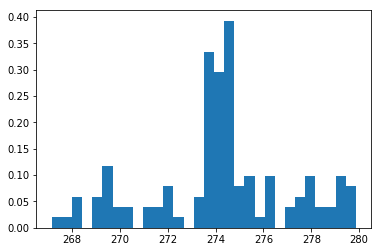

In [26]:
hist = plt.hist(vancouver_temp["01-01"], bins=30, normed=True)

In [27]:
from sklearn.neighbors import KernelDensity

In [34]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(np.array(vancouver_temp["01-01"])[:,None])

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [35]:
v_01_01 = vancouver_temp["01-01"]

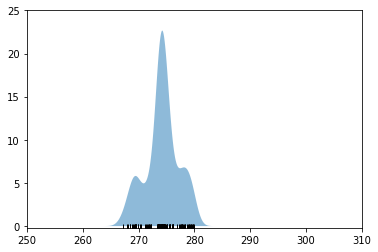

In [41]:
from scipy.stats import norm
x_d = np.linspace(260, 290, 1000)
density = sum(norm(xi).pdf(x_d) for xi in v_01_01)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(v_01_01, np.full_like(v_01_01, -0.1), '|k', markeredgewidth=1)

plt.axis([250, 310, -0.2, 25]);

In [42]:
kde.sample()

array([[272.44301798]])

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [79]:
bandwidths = 10 ** np.linspace(-1,1,100)

In [82]:
grid_cv = GridSearchCV(KernelDensity(kernel='gaussian'),
                       {"bandwidth": bandwidths})
                      

In [ ]:
grid_cv.fit(vancouver_temp[:,None])

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


## Temperature Pressure Dependencies

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [5]:
temperature_file_name = "temperature.csv"
pressure_file_name = "pressure.csv"
humidity_file_name = "humidity.csv"
weather_type = "weather_description.csv"

In [6]:
PATH = "/home/jovyan/persist/modsimpy/data/"
pd_temperature = pd.read_csv(PATH+temperature_file_name)
pd_pressure = pd.read_csv(PATH+pressure_file_name)
pd_humidity = pd.read_csv(PATH+humidity_file_name)

In [8]:
def extract_city_temperature_diff(cityname):
    
    #pd_temperature = pd_temperature.dropna()

    #pd_temperature.head()
    pd_temperature_portland = pd_temperature[["datetime", cityname]]

    #pd_temperature_portland.head()

    pd_temperature_portland_diff = pd_temperature_portland.set_index('datetime').diff()

    #pd_temperature_portland_diff.head()
    return pd_temperature_portland_diff

def extract_city_temperature(cityname):
    pd_temperature_port = pd_temperature[["datetime",cityname]]
    return pd_temperature_port

def extract_city_pressure(cityname):
    pd_pressure_port = pd_pressure[["datetime",cityname]]
    return pd_pressure_port

def extract_city_humdity(cityname):
    pd_humdity_port = pd_humidity[["datetime",cityname]]
    return pd_humdity_port

pd_temperature_diff = extract_city_temperature_diff("Jerusalem")
pd_temperature_port = extract_city_temperature("Jerusalem")
pd_pressure_port = extract_city_pressure("Jerusalem")
pd_humdity_port = extract_city_humdity("Jerusalem")

In [9]:
pd_temperature_diff.head()
#pd_pressure = pd_pressure.dropna()


#pd_pressure["Portland"]

#pd_pressure_port.head()

,Jerusalem
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,NaN
2012-10-01 14:00:00,0.0
2012-10-01 15:00:00,0.0
2012-10-01 16:00:00,0.0


In [10]:
def merge_temperature_df(pd_temperature_portland_diff,pd_pressure_port):
    pd_temperature_change_pressure_relation = pd.merge(pd_temperature_portland_diff, pd_pressure_port , on ="datetime")

    pd_temperature_change_pressure_relation = pd_temperature_change_pressure_relation.dropna()
    #pd_temperature_change_pressure_relation.head()
    return pd_temperature_change_pressure_relation

pd_temperature_change_temperature = merge_temperature_df(pd_temperature_diff,pd_temperature_port)
pd_temperature_change_pressure_relation = merge_temperature_df(pd_temperature_diff,pd_pressure_port)
pd_temperature_change_humdity = merge_temperature_df(pd_temperature_diff,pd_humdity_port)

In [11]:
pd_temperature_change_temperature.head()

,datetime,Jerusalem_x,Jerusalem_y
2,2012-10-01 14:00:00,0.0,303.5
3,2012-10-01 15:00:00,0.0,303.5
4,2012-10-01 16:00:00,0.0,303.5
5,2012-10-01 17:00:00,0.0,303.5
6,2012-10-01 18:00:00,0.0,303.5


In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



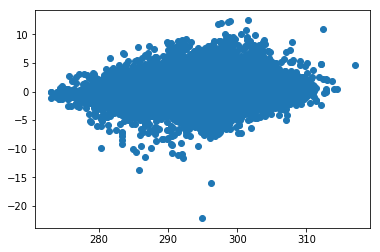

In [14]:
#x = pd_temperature_change_pressure_relation["Jerusalem_y"]
#y = pd_temperature_change_pressure_relation["Jerusalem_x"]

#x = pd_temperature_change_humdity["Jerusalem_y"]
#y = pd_temperature_change_humdity["Jerusalem_x"]

x = pd_temperature_change_temperature["Jerusalem_y"]
y = pd_temperature_change_temperature["Jerusalem_x"]

plt.scatter(x,y)

## Temperature Humidity Dependencies

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = x[:,None]
# y = 1 * x_0 + 2 * x_1 + 3

reg = LinearRegression().fit(X, y)
reg.score(X, y)

#reg.coef_

#reg.intercept_ 

0.009872313586589798

In [18]:
reg.coef_,reg.intercept_ 

(array([0.01976818]), -5.79592365174457)

In [19]:
reg.coef_[0],reg.intercept_

(0.01976817604010132, -5.79592365174457)

In [21]:
303.5*reg.coef_[0] + reg.intercept_ + 303.5

303.7037177764262

In [22]:
weather_mapping = {

    'mist': 'Foggy',
    'broken clouds': 'Cloudy',
    'sky is clear': 'Clearsky',
    'light rain': 'Rainy',
    'few clouds': 'Cloudy',
    'fog': 'Foggy',
    'overcast clouds': 'Cloudy',
    'light intensity shower rain': 'Rainy',
    'moderate rain': 'Rainy',
    'light intensity drizzle': 'Rainy',
    'scattered clouds': 'Cloudy',
    'proximity shower rain': 'Rainy',
    'heavy intensity rain': 'Rainy',
    'heavy snow': 'Snow',
    'shower rain': 'Rainy',
    'snow': 'Snow',
    'heavy shower snow': 'Snowstorm',
    'light intensity drizzle rain': 'Rainy',
    'light snow': 'Snow',
    'very heavy rain': 'Rainy',
    'smoke': 'Smog',
    'thunderstorm with heavy rain': 'Thunderstorm',
    'light shower snow': 'Snow',
    'thunderstorm': 'Thunderstorm',
    'thunderstorm with light rain': 'Thunderstorm',
    'haze': 'Smog',
    'dust': 'Smog',
    'volcanic ash': 'Smog',
    'heavy intensity shower rain': 'Rainy',
    'thunderstorm with rain': 'Thunderstorm',
    'sleet': 'Snow',
    'light rain and snow': 'Snow',
    'drizzle': 'Rainy',
    'shower snow': 'Snowstorm',
    'light shower sleet': 'Snow',
    'proximity thunderstorm': 'Thunderstorm',
    'ragged thunderstorm': 'Thunderstorm',
    'freezing rain': 'Snow',
    'heavy intensity drizzle': 'Rainy',
    'proximity thunderstorm with rain': 'Thunderstorm',
    'proximity thunderstorm with drizzle': 'Thunderstorm',
    'thunderstorm with drizzle': 'Thunderstorm',
    'thunderstorm with light drizzle': 'Thunderstorm',
    'thunderstorm with heavy drizzle': 'Thunderstorm',
    'heavy thunderstorm': 'Thunderstorm',
    'squalls': 'Windy',
    'proximity sand/dust whirls': 'Sandstorm',
    'proximity moderate rain': 'Rainy',
    'sand': 'Sandstorm',
    'sand/dust whirls': 'Sandstorm',
    'tornado': 'Tornado',
    'shower drizzle': 'Rainy',
    'rain and snow': 'Snow',
    'ragged shower rain': 'Rain'
}

In [25]:
np.array(list(set(weather_mapping.values())))

array(['Tornado', 'Rainy', 'Sandstorm', 'Snow', 'Foggy', 'Cloudy',
       'Windy', 'Rain', 'Snowstorm', 'Clearsky', 'Smog', 'Thunderstorm'],
      dtype='<U12')